***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Radio Science using Interferometric Arrays](01_00_introduction.ipynb)  
    * Previous: [1.4 Radio regime](01_04_radio_regime.ipynb)
    * Next: [1.6 Synchrotron emission](01_06_synchrotron_emission.ipynb)
    
***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
import scipy.constants
from IPython.display import Image

In [3]:
HTML('../style/code_toggle.html')

## 1.5 Thermal Emission:

There are two main types of continuum emission mechanisms we'll encounter in radio astronomy, thermal and non-thermal. As the names suggest, the thermal emission depends on the *temperature* of the black body - non-thermal emission depends on some other properties of the emitting body. In the next few sections, we'll have an overview of the emission mechanisms and some examples of each in radio astronomy. 

We'll begin the overview with an example of one of the mechanisms of thermal emission, blackbody emission. 

### 1.5.1 Blackbody Emission:<a id='science:sec:blackbody_emission'></a>

Blackbody emission or thermal emission is an important form of radiation in astronomy. This is in the cases when Thermodynamic Equilibrium exists between radiation and matter - where radiation and matter interact enough to produce the following expression for the specific intensity to be:

\begin{equation}
B_{\nu}(T)=\frac{2h\nu^{3}}{c^{2}} \frac{1}{e^{\frac{h\nu}{kT}}-1},
\end{equation}

this is also known as the Planck Spectrum.

From the equation above, it can be inferred that in a given frequncy interval, the brightness depends only on the *Temperature* of the body. Also, one can see that a body at a higher temperature will produce higher brightness *at all frequencies* - which means that a body at a higher temperature has higher energy output via thermal emission than that of a body at a lower temperature. Yet another consequence is that the frequency at which maximum brightness is produced is directly proportional to the temperature - this is known as Wien's displacement law:

$$\nu_{max} = 58.789  T $$ , 

where frequency is in GHz and temperature is in Kelvin. See, for example, Figure [1.5.2](#science:fig:bb_distr), where the black body spectrum for various temperatures is plotted. The displacement of the frequency at which the peak occures can be seen clearly.

At high frequencies where $h\nu >> kT$
 , this will reduce to Wien's approximation :

$$B_{\nu}(T)= \frac{2h\nu^{3}}{c^{2}} e^{\frac{-h\nu}{kT}}$$ 

But in radio astronomy, a more typical situation is when the frequency of the radiation is so low that:  $h\nu << kT$. In such a case, the Planck formula may be reduced to what is called the Rayleigh-Jeans approximation:

$$B_{\nu}(T)= \frac{2\nu^{2}}{c^{2}} kT $$

In [4]:
def B_v(T):
    '''Function to calculate specific intensity/brightness distribution of black
    body radiation at a given temperature. T is in Kelvins and frequency 
    is in Hertz'''
    #Use Wien's displacement law to find the frequency range for given Temperature.
    # nu_max(in GHz) = 58.789*T(in Kelvin)
    nu_max = 58.79 * T
    freq = np.arange(1,2000,1)
    freq = freq * nu_max / 500.0 # Scale so that the the peak value occures at 1/4 the length of the array.
    B = (2*scipy.constants.h/scipy.constants.c**2.0) * np.exp(-1. * scipy.constants.h * \
                                                              freq * 10**9/(scipy.constants.k*T)) * (freq*10**9)**3
    #Change units for plotting to Jansky
    # 1 Jansky = 10^-26 W/m^2 Hz
    B = B * 10**26
    return B

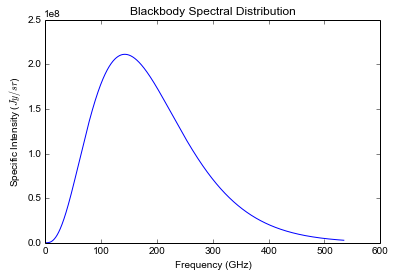

In [5]:
T = 2.275 #In Kelvin
freq = np.arange(1,2000,1)
freq = freq*58.79*T/500.0
B_CMB = B_v(T)
fig,ax = plt.subplots()
ax.plot(freq,B_CMB)
ax.set_xlabel("Frequency (GHz)")
ax.set_ylabel("Specific Intensity ($Jy/sr$)")
ax.set_title("Blackbody Spectral Distribution")

**Figure 1.5.1**: *Blackbody radiation spectral distribution for Cosmic Microwave Background *. <a id='science:fig:bb_distr_cmb'></a>

The above distribution is for a temperature of 2.725 K, approximately the same as that of the Cosmic Microwave Background. If 'T' in the above script is changed to $~ 5700$ (K), we would get the plot for the emission from the Sun. 

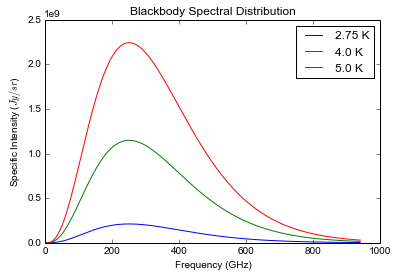

In [6]:
T = 4 #in Kelvin
freq = np.arange(1,2000,1)
freq = freq*58.79*T/500.0
B_2 = B_v(T)
B_3 = B_v(5)
fig,ax = plt.subplots()
ax.plot(freq,B_CMB, label='2.75 K')
ax.plot(freq,B_2, label='4.0 K')
ax.plot(freq,B_3, label='5.0 K')
ax.legend()
ax.set_xlabel("Frequency (GHz)")
ax.set_ylabel("Specific Intensity ($Jy/sr$)")
ax.set_title("Blackbody Spectral Distribution")

**Figure 1.5.2**: *Blackbody radiation spectral distribution*. <a id='science:fig:bb_distr'></a>

As mentioned above, the brightness of the black body radiation depends only on the temperature of the body. This can be used to define a 'brightness temperature' for an object. Simply put, the brightness temperature for an object is given by : $$T_{b} = I_{\nu} \frac{c^{2}}{2k\nu^{2}}$$. It should be noted here that the actual specific intensity of an object is used here, *even when it does not represent black body emission* - the brightness temperature is simply the temperature which the object would have if the specific intensity or brightness was from black body emission. This allows characterization of any object in terms of a single parameter. This is used widely in radio astronomy, and will be encountered in next chapters of this book.


### 1.5.2 Thermal Bremsstrahlung Emission :<a id='science:sec:bremsstrahlung_emission'></a>

Thermal Bremsstrahlung radiation another example of thermal radiation. The word Bremsstrahlung is German, meaning 'braking radiation'. This is becuase the origin of bremsstrahlung radiation is in accelerating (nonrelativistic) particles in electric field. The 'thermal' designation comes through for collection of particles which are in local thermodynamic equilibrium. 

<p class=prerequisites>
  <font size=4> <b>Prerequisites</b></font>
  <br>
  <br>
&bull; <b>Larmor's formula  <br><br>
</p>

To understand the Bremsstrahlung emission from a collection of charged particles (which is what we see in any astronomical scenario), we need to know first the case of a single accelerating charged particle in electric field. 
For such a particle the total power emitted would be, according to Larmor's formula:
$$P= \frac{2}{3}\frac{q^{2}\mathbf{a}^{2}}{c^{3}}$$, where a is the acceleration of the charged particle, q being the charge of the particle and c being the speed of light. 

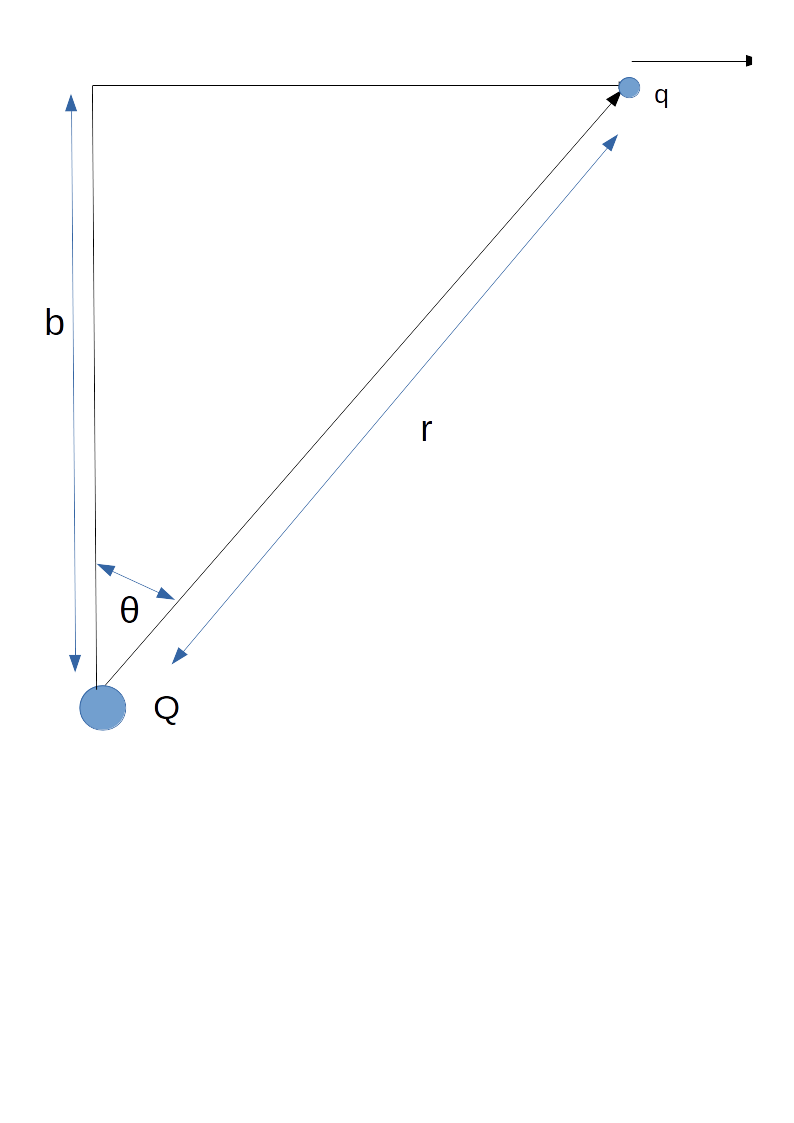

In [7]:
Image(filename='figures/bremsstrahlung_fig.png', width=300)

The acceleration experienced by the charged particle can be estimated by remembering that $$\mathbf{a} = \mathbf{F}/m = Qq\mathbf{r}/mr^3$$, where Q is the charge of the particle generating the electric field (see figure below). From this, it is apparent that the best emitters of power using this mechanism are the least massive charged particles, i.e. the electrons. Since the protons have a larger mass by a factor of 1000, the total power emitted by them is negligible compared to those of electrons - which in turns means that an ion-electron system would contribute the most to the total power emitted. A key point to note that the electrons are not captured by the ions in this system; which is why this emission is also called *free-free* emission.

For radio frequencies, only the *perpendicular* (to the path) component of the acceleration is important. The emission of the energy from this interaction happens in a pulse, corresponding to the time $t = b/v$, where $v$ is the velocity of the particle. The perpendicular acceleration is :
$$a_{\perp} = \frac{Qq\,cos^{3}\theta}{m_{e}b^2}$$, 
For an ion (with atomic number Z) and electron system,
$$a_{\perp} = \frac{Ze^{2}\,cos^{3}\theta}{m_{e}b^2}$$

Plugging this back, we get,
$$P = \frac{2}{3}\frac{Z^2e^{6}cos^{6}\theta}{m_{e}^2 \,b^{4}c^{3}} $$
This is the instantaneous power emitted by the electron through bremsstrahlung radiation. Since the power is emitted in a pulse $t \sim b/v$, the emission has a characteristic frequency $\omega_{c}\sim v/b$, below which the power spectrum is flat and above which it falls rapidly. The total energy emitted is given by:
$$E = \int P dt = \frac{2}{3}\frac{Z^2e^{6}}{m_{e}^2 \,b^{4}c^{3}}\int cos^{6}\theta(t)\,dt $$
The integration over $\theta$ can be carried out by noting that $v = dx/dt$, where $x = b\, tan\theta$, giving:
$$E = \frac{\pi}{4}\frac{Z^2e^{6}}{m_{e}^2 \,b^{3}c^{3}v} $$. 

For a collection of particles, the combined spectrum of the bremsstrahlung emission thus would consist of individual contributions, essentially boiling down to integrations over the parameters $v$ and $b$ (assuming of course, that the collection of particles is more or less homogeneous). A typical scenario is that of ionized clouds, say HII regions, since Hydrogen is one of the most abundant elements in the universe. HII regions are typically formed around young, bright stars.

For such regions, we can use a Maxwell distribution function for the velocities,
$$f(v) = \frac{4v^{2}}{\sqrt \pi} (\frac{m}{2kT})^{3/2}\,exp(-\frac{mv^{2}}{2kT})$$.

Using these equations, we can get the emissivity, 

$$\epsilon_{\nu} = \frac{8}{3}\frac{Z^{2}e^{6}}{c^{3}}\frac{N_{i}N_{e}}{m^{2}}(\frac{2m}{\pi \,kT})^{1/2} ln\frac{b_{2}}{b_{1}}$$.



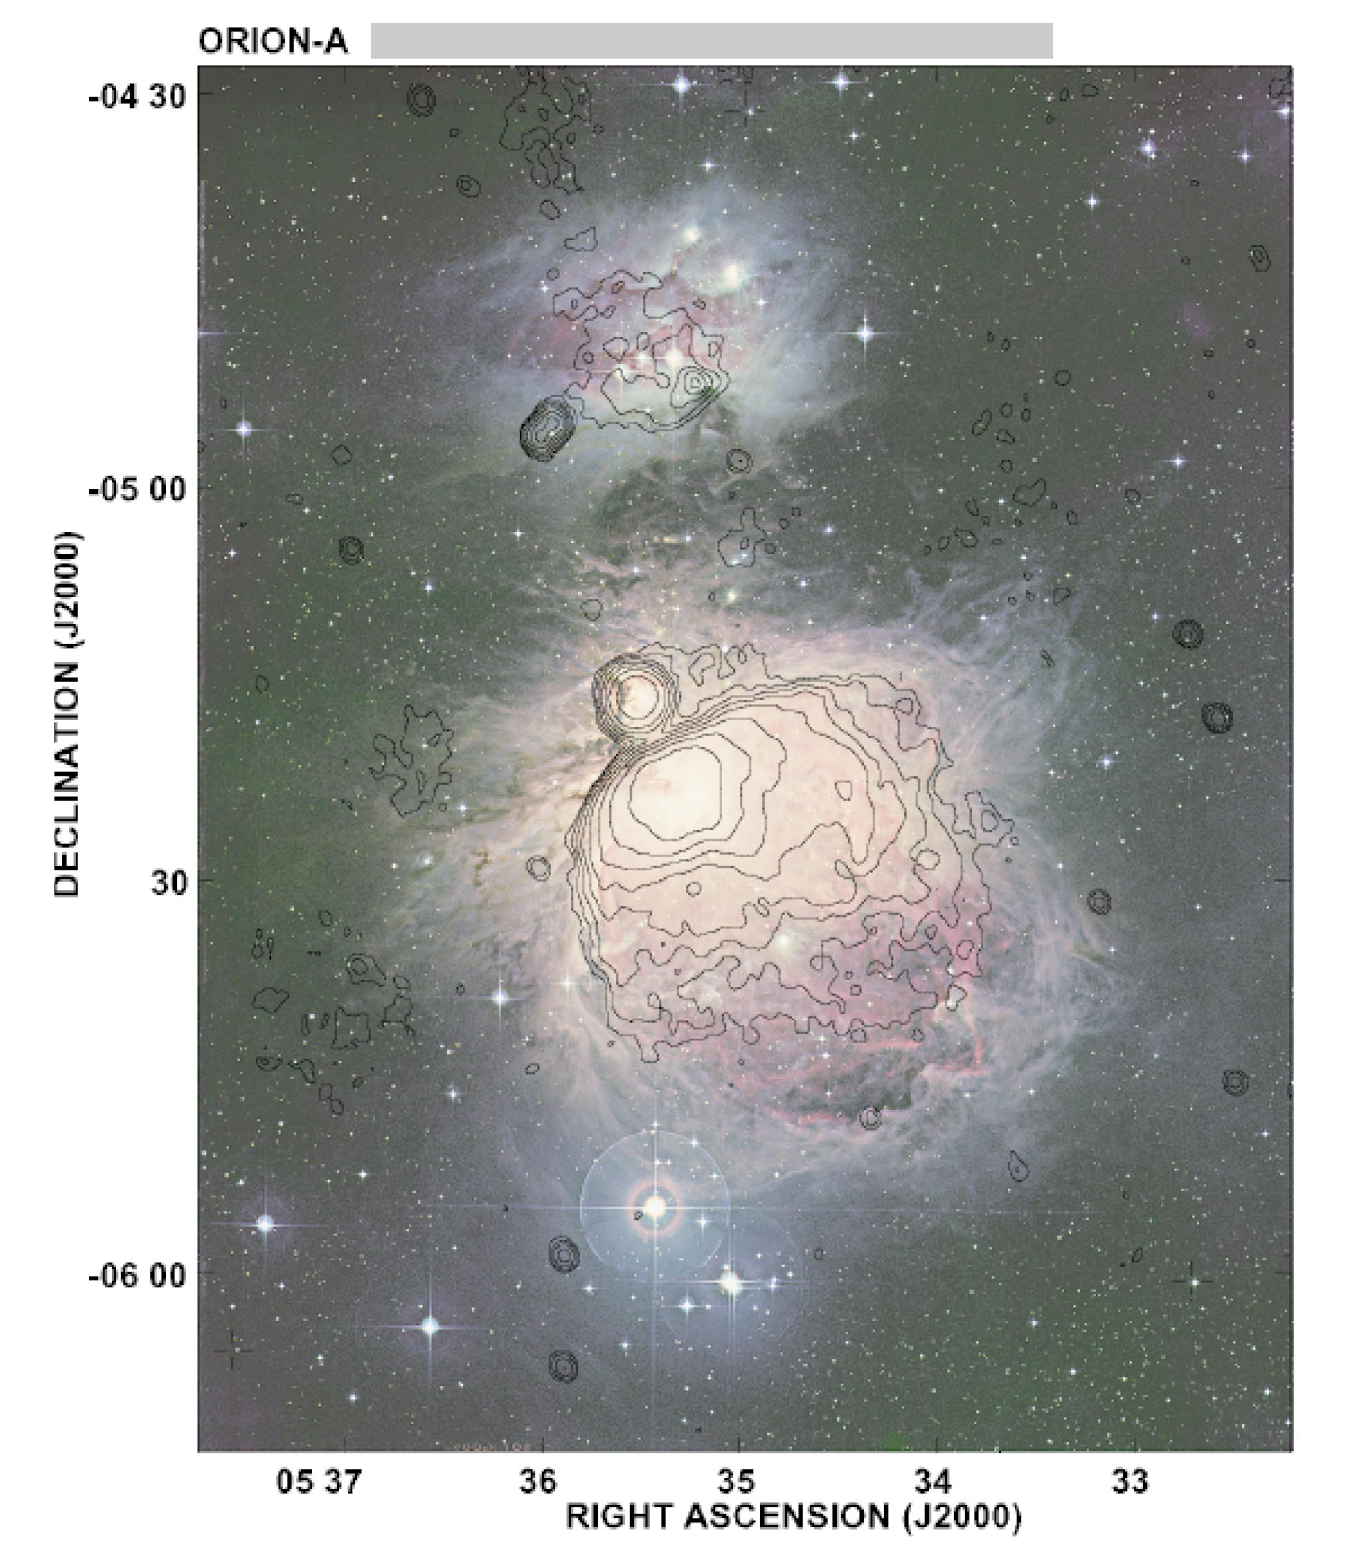

In [8]:
Image(filename='figures/orion_HII.png', width=300)

Figure taken from [Radio Continuum Structure of the Orion Nebula](http://iopscience.iop.org/article/10.1086/318017/pdf).

***

* Next: [1.6 Synchrotron emission](01_06_synchrotron_emission.ipynb)